In [ ]:
#Import library- untuk split data dan model Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#upload data
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
#menampilkan data
dataset = pd.read_csv("creditcard.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Cek info data
print(dataset.info())
print(dataset['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


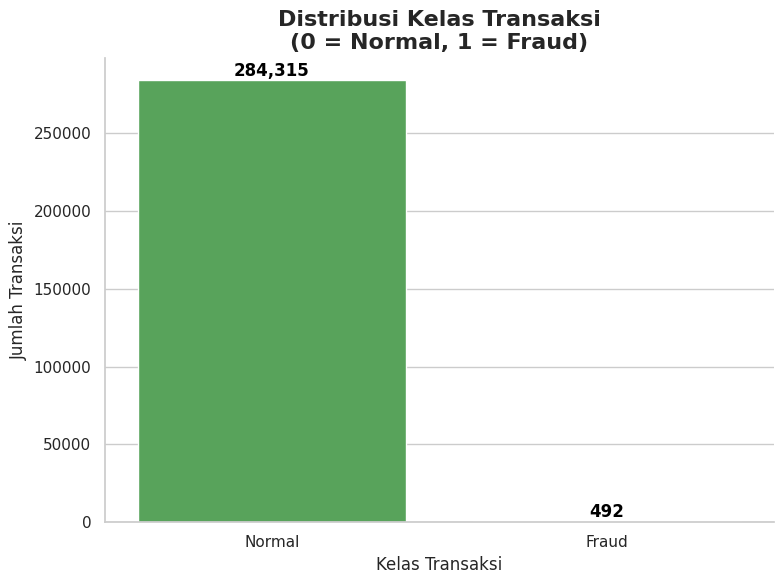

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat kolom baru yang isinya label teks untuk pewarnaan dengan hue
dataset['Class_Label'] = dataset['Class'].map({0: 'Normal', 1: 'Fraud'})

# Set style modern
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Buat countplot dengan hue sebagai pengganti palette langsung
ax = sns.countplot(
    x='Class_Label',
    data=dataset,
    palette={'Normal': "#4CAF50", 'Fraud': "#F44336"},
    hue='Class_Label',
    legend=False
)

# Tambahkan label angka di atas bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count:,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='black')

# Tambahkan deskripsi
plt.title("Distribusi Kelas Transaksi\n(0 = Normal, 1 = Fraud)", fontsize=16, weight='bold')
plt.xlabel("Kelas Transaksi", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Rapikan
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# Import scaler
scaler = StandardScaler()

# Normalisasi kolom 'Amount'
dataset['Amount'] = scaler.fit_transform(dataset[['Amount']])

# Drop kolom 'Time'
dataset = dataset.drop(columns=['Time'])

In [ ]:
# Memisahkan fitur (X) dan label (y) dari dataset
# X adalah semua kolom kecuali 'Class', yang akan digunakan sebagai input untuk model
X = dataset.drop(columns=['Class', 'Class_Label'])  # ⬅️ ini penting!
y = dataset['Class']
# y adalah kolom 'Class', yang merupakan target yang ingin diprediksi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
# Membagi data menjadi data latih dan data uji
# test_size=0.3 artinya 30% data digunakan untuk pengujian, sisanya 70% untuk pelatihan
# random_state=42 membuat hasil pembagian data selalu sama setiap kali dijalankan
# stratify=y memastikan distribusi kelas di data latih dan data uji tetap seimbang

In [ ]:
# Membuat model Random Forest dengan 100 pohon (n_estimators=100)
# random_state=42 agar hasil model konsisten tiap kali dijalankan
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Melatih (fit) model menggunakan data latih

RandomForestClassifier(random_state=42)

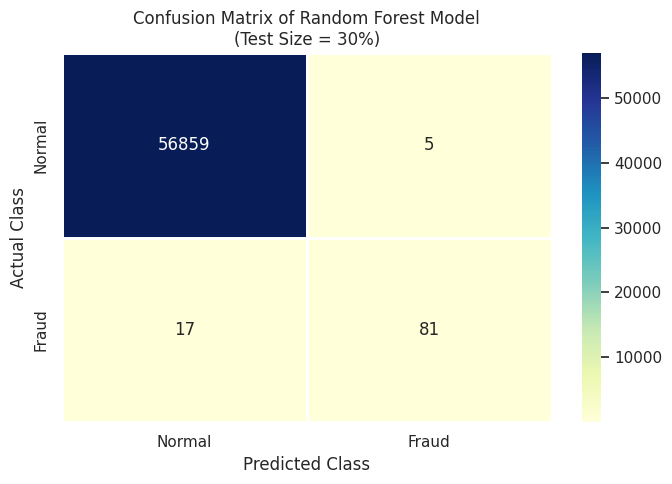

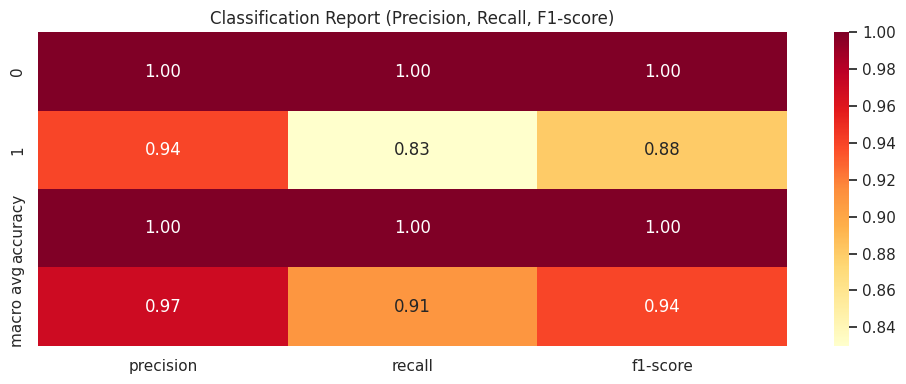

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prediksi
y_pred = model.predict(X_test)

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
labels = ["Normal", "Fraud"]

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels, linewidths=1)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix of Random Forest Model\n(Test Size = 30%)")
plt.tight_layout()
plt.show()

# CLASSIFICATION REPORT - HEATMAP
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().round(2)

plt.figure(figsize=(10, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()


In [ ]:
#melihat hasil prediksi model dibandingkan dengan nilai aslinya
output_df = X_test.copy()
output_df['Actual'] = y_test
output_df['Prediction'] = y_pred
print(output_df.head())

              V1        V2        V3        V4        V5        V6        V7  \
263020 -0.674466  1.408105 -1.110622 -1.328366  1.388996 -1.308439  1.885879   
11378  -2.829816 -2.765149  2.537793 -1.074580  2.842559 -2.153536 -1.795519   
147283 -3.576495  2.318422  1.306985  3.263665  1.127818  2.865246  1.444125   
219439  2.060386 -0.015382 -1.082544  0.386019 -0.024331 -1.074935  0.207792   
36939   1.209965  1.384303 -1.343531  1.763636  0.662351 -2.113384  0.854039   

              V8        V9       V10  ...       V22       V23       V24  \
263020 -0.614233  0.311652  0.650757  ...  0.810034 -0.224327  0.707899   
11378  -0.250020  3.073504 -1.000418  ...  0.109305 -0.813272  0.042996   
147283 -0.718922  1.874046  7.398491  ...  0.016867 -0.132058 -1.483996   
219439 -0.338140  0.455091  0.047859  ... -0.639426  0.331818 -0.067584   
36939  -0.475963 -0.629658 -1.579654  ... -0.328294 -0.154631  0.619449   

             V25       V26       V27       V28    Amount  Actual  Pr

In [ ]:
# Menyaring baris di mana prediksi model adalah 1 (artinya: FRAUD)
fraud_prediksi = output_df[output_df['Prediction'] == 1]
print(fraud_prediksi)

               V1         V2         V3        V4         V5        V6  \
190263  -1.272117   1.827615  -3.810610  0.583759  -0.641242 -1.389043   
77348   -1.271244   2.462675  -2.851395  2.324480  -1.372245 -0.948196   
102442 -13.192671  12.785971  -9.906650  3.320337  -4.801176  5.760059   
14920  -17.950631  11.067069 -20.742660  6.075531 -13.389765 -4.532888   
119781  -2.866364   2.346949  -4.053307  3.983359  -3.463186 -1.280953   
...           ...        ...        ...       ...        ...       ...   
83417   -3.215382  -0.364223  -1.261883  3.794949   0.711206 -1.316476   
8615    -3.891192   7.098916 -11.426467  8.607557  -2.065706 -2.985288   
143333  -7.030308   3.421991  -9.525072  5.270891  -4.024630 -2.865682   
124176  -0.356326   1.435305  -0.813564  1.993117   2.055878 -0.543579   
181966  -0.769172   1.342212  -2.171454 -0.151513  -0.648374 -0.973504   

               V7         V8        V9        V10  ...       V22       V23  \
190263  -1.954054   1.173920 -2.0